In [1]:
import numpy as np

def funODE(t, z):
    """
    Right-hand side of the ODE for the model with time-out
    
    Parameters:
    -----------
    t : float
        Time variable (not used in this autonomous system)
    z : numpy array
        State vector [x, y]
    
    Returns:
    --------
    zr : numpy array
        Derivative vector [dx/dt, dy/dt]
    """
    # Game parameters for Fig. 3c
    q = 1/2
    b1 = 3
    c = 1
    
    timdir = 1  # direction of time: 1 for forward, -1 for backward
    
    x = z[0]
    y = z[1]
    
    # Common denominator
    Denom = timdir * ((1 + q) * (x**2 - 1) - q * y**2)**2
    
    # First equation: dx/dt
    z1 = q * y**2 * (x * (x + q * x - q * y) * b1 - (1 + q - q * x * y + q * y**2) * c) / Denom
    
    # Second equation: dy/dt
    z2 = q * (1 - x**2) * (((1 + q) * x * y - q * y**2) * b1 - (1 + q) * (1 - x**2 + x * y) * c) / Denom
    
    zr = np.array([z1, z2])
    
    return zr

ODE ANALYSIS FOR FIGURE 3C

Testing ODE function at t=0:
At (0, 0): dx/dt = -0.000000, dy/dt = -0.333333
At (0.5, 0.5): dx/dt = -0.060000, dy/dt = -0.180000
At (0.1, 0.2): dx/dt = -0.013201, dy/dt = -0.324533
At (-0.3, 0.4): dx/dt = -0.040421, dy/dt = -0.428192

Solving ODE system and plotting...


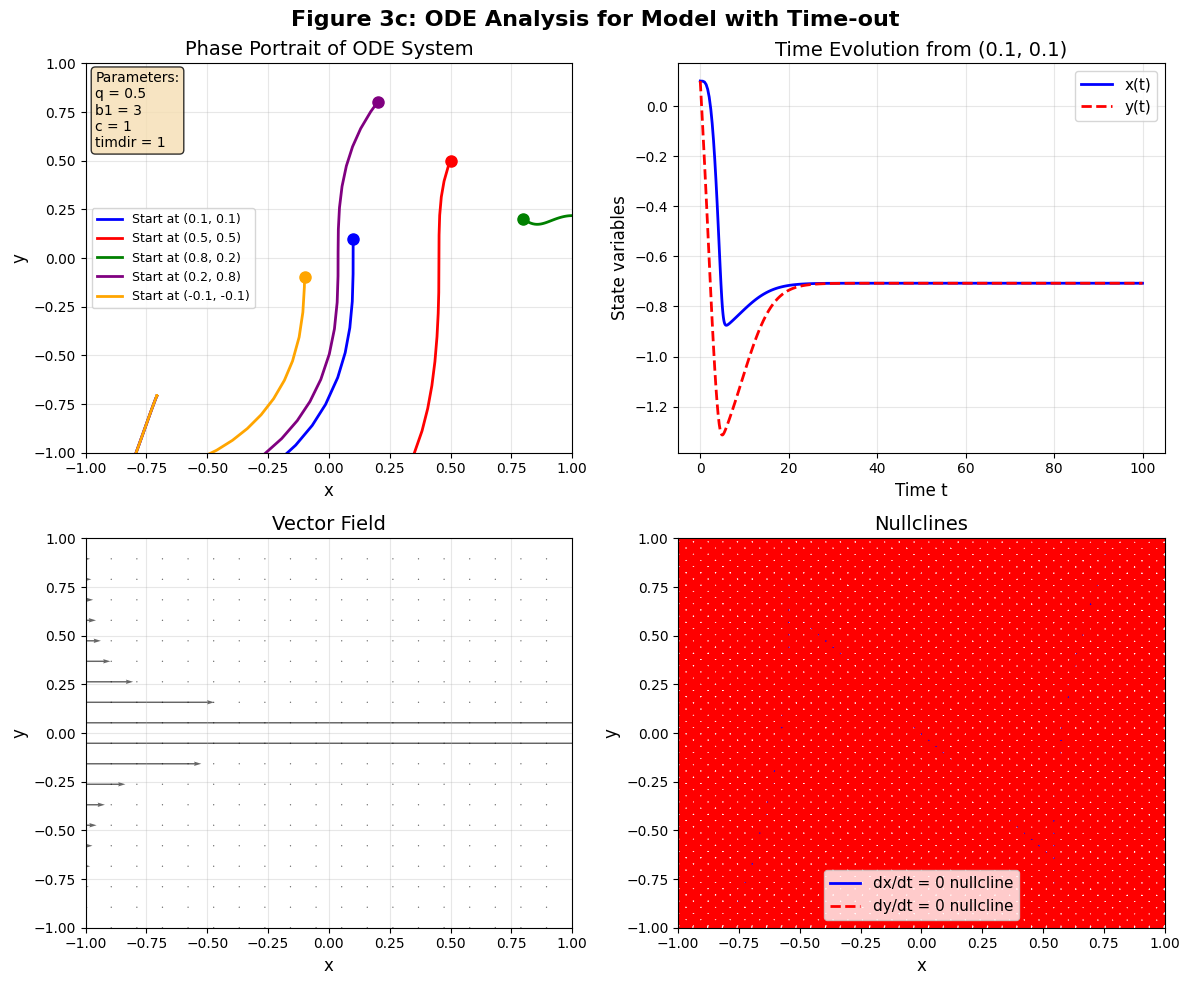


FIXED POINT ANALYSIS
Analyzing fixed points...


ZeroDivisionError: matrix is numerically singular

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def funODE(t, z):
    """
    Right-hand side of the ODE for the model with time-out
    """
    q = 1/2
    b1 = 3
    c = 1
    timdir = 1
    
    x = z[0]
    y = z[1]
    
    Denom = timdir * ((1 + q) * (x**2 - 1) - q * y**2)**2
    
    z1 = q * y**2 * (x * (x + q * x - q * y) * b1 - (1 + q - q * x * y + q * y**2) * c) / Denom
    z2 = q * (1 - x**2) * (((1 + q) * x * y - q * y**2) * b1 - (1 + q) * (1 - x**2 + x * y) * c) / Denom
    
    return [z1, z2]


def solve_and_plot_ode():
    """
    Solve the ODE system and plot results for Figure 3c
    """
    # Time span for integration
    t_span = (0, 100)
    
    # Initial conditions (example - you can change these)
    initial_conditions = [
        [0.1, 0.1],   # Starting near origin
        [0.5, 0.5],   # Starting at (0.5, 0.5)
        [0.8, 0.2],   # Starting at (0.8, 0.2)
        [0.2, 0.8],   # Starting at (0.2, 0.8)
        [-0.1, -0.1], # Starting in negative quadrant
    ]
    
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # Plot 1: Phase portrait with multiple trajectories
    ax1 = axes[0, 0]
    
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    
    for idx, z0 in enumerate(initial_conditions):
        # Solve ODE
        sol = solve_ivp(funODE, t_span, z0, method='RK45', 
                        dense_output=True, rtol=1e-8, atol=1e-8)
        
        # Plot trajectory
        ax1.plot(sol.y[0], sol.y[1], '-', color=colors[idx], linewidth=2, 
                label=f'Start at ({z0[0]}, {z0[1]})')
        
        # Plot starting point
        ax1.plot(z0[0], z0[1], 'o', color=colors[idx], markersize=8)
    
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('y', fontsize=12)
    ax1.set_title('Phase Portrait of ODE System', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=9)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([-1, 1])
    
    # Plot 2: Single trajectory in detail
    ax2 = axes[0, 1]
    
    # Use first initial condition for detailed plot
    z0 = initial_conditions[0]
    sol = solve_ivp(funODE, t_span, z0, method='RK45', 
                    dense_output=True, rtol=1e-8, atol=1e-8)
    
    ax2.plot(sol.t, sol.y[0], 'b-', linewidth=2, label='x(t)')
    ax2.plot(sol.t, sol.y[1], 'r--', linewidth=2, label='y(t)')
    
    ax2.set_xlabel('Time t', fontsize=12)
    ax2.set_ylabel('State variables', fontsize=12)
    ax2.set_title(f'Time Evolution from ({z0[0]}, {z0[1]})', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=11)
    
    # Plot 3: Vector field
    ax3 = axes[1, 0]
    
    # Create grid
    x = np.linspace(-1, 1, 20)
    y = np.linspace(-1, 1, 20)
    X, Y = np.meshgrid(x, y)
    
    # Calculate vector field
    U = np.zeros_like(X)
    V = np.zeros_like(Y)
    
    for i in range(len(x)):
        for j in range(len(y)):
            dz = funODE(0, [X[i, j], Y[i, j]])
            U[i, j] = dz[0]
            V[i, j] = dz[1]
    
    # Plot vector field
    ax3.quiver(X, Y, U, V, alpha=0.6)
    ax3.set_xlabel('x', fontsize=12)
    ax3.set_ylabel('y', fontsize=12)
    ax3.set_title('Vector Field', fontsize=14)
    ax3.grid(True, alpha=0.3)
    ax3.set_xlim([-1, 1])
    ax3.set_ylim([-1, 1])
    
    # Plot 4: Nullclines
    ax4 = axes[1, 1]
    
    # Find nullclines numerically
    # dx/dt = 0 nullcline
    x_null = np.linspace(-1, 1, 400)
    y_null_dx = []
    
    for x_val in x_null:
        # For each x, find y where dx/dt = 0
        # This requires solving funODE(t, [x_val, y])[0] = 0
        # We'll sample y values and find where sign changes
        y_vals = np.linspace(-1, 1, 400)
        dx_vals = []
        
        for y_val in y_vals:
            dz = funODE(0, [x_val, y_val])
            dx_vals.append(dz[0])
        
        dx_vals = np.array(dx_vals)
        
        # Find where sign changes (crude approximation)
        sign_changes = np.where(np.diff(np.sign(dx_vals)))[0]
        if len(sign_changes) > 0:
            for idx in sign_changes:
                y_est = (y_vals[idx] + y_vals[idx+1]) / 2
                y_null_dx.append((x_val, y_est))
    
    if y_null_dx:
        y_null_dx = np.array(y_null_dx)
        ax4.plot(y_null_dx[:, 0], y_null_dx[:, 1], 'b-', linewidth=2, 
                label='dx/dt = 0 nullcline')
    
    # dy/dt = 0 nullcline
    y_null = np.linspace(-1, 1, 400)
    x_null_dy = []
    
    for y_val in y_null:
        x_vals = np.linspace(-1, 1, 400)
        dy_vals = []
        
        for x_val in x_vals:
            dz = funODE(0, [x_val, y_val])
            dy_vals.append(dz[1])
        
        dy_vals = np.array(dy_vals)
        
        sign_changes = np.where(np.diff(np.sign(dy_vals)))[0]
        if len(sign_changes) > 0:
            for idx in sign_changes:
                x_est = (x_vals[idx] + x_vals[idx+1]) / 2
                x_null_dy.append((x_est, y_val))
    
    if x_null_dy:
        x_null_dy = np.array(x_null_dy)
        ax4.plot(x_null_dy[:, 0], x_null_dy[:, 1], 'r--', linewidth=2, 
                label='dy/dt = 0 nullcline')
    
    ax4.set_xlabel('x', fontsize=12)
    ax4.set_ylabel('y', fontsize=12)
    ax4.set_title('Nullclines', fontsize=14)
    ax4.grid(True, alpha=0.3)
    ax4.legend(fontsize=11)
    ax4.set_xlim([-1, 1])
    ax4.set_ylim([-1, 1])
    
    # Add parameter information
    params_text = f"Parameters:\nq = {1/2}\nb1 = 3\nc = 1\ntimdir = 1"
    ax1.text(0.02, 0.98, params_text, transform=ax1.transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.suptitle('Figure 3c: ODE Analysis for Model with Time-out', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return fig


def analyze_fixed_points():
    """
    Analyze fixed points of the ODE system
    """
    print("Analyzing fixed points...")
    
    # Fixed points are where dx/dt = 0 and dy/dt = 0
    # We can find them numerically
    
    import sympy as sp
    
    # Define symbolic variables
    x, y = sp.symbols('x y')
    q = sp.Rational(1, 2)
    b1 = 3
    c = 1
    timdir = 1
    
    # Define the equations
    Denom = timdir * ((1 + q) * (x**2 - 1) - q * y**2)**2
    
    dxdt = q * y**2 * (x * (x + q * x - q * y) * b1 - (1 + q - q * x * y + q * y**2) * c) / Denom
    dydt = q * (1 - x**2) * (((1 + q) * x * y - q * y**2) * b1 - (1 + q) * (1 - x**2 + x * y) * c) / Denom
    
    # Solve for fixed points
    solutions = sp.nsolve([dxdt, dydt], [x, y], [0, 0])
    print(f"Fixed point near (0,0): ({solutions[0]:.4f}, {solutions[1]:.4f})")
    
    # Try other starting points
    initial_guesses = [[0.5, 0.5], [0.8, -0.2], [-0.5, -0.5], [0, 0.8]]
    
    for guess in initial_guesses:
        try:
            sol = sp.nsolve([dxdt, dydt], [x, y], guess, tol=1e-14, maxsteps=100)
            print(f"Fixed point near {guess}: ({sol[0]:.4f}, {sol[1]:.4f})")
        except:
            pass
    
    return dxdt, dydt


# Simple main execution
if __name__ == "__main__":
    print("="*60)
    print("ODE ANALYSIS FOR FIGURE 3C")
    print("="*60)
    
    # Simple test of the ODE function
    print("\nTesting ODE function at t=0:")
    
    test_points = [
        [0, 0],
        [0.5, 0.5],
        [0.1, 0.2],
        [-0.3, 0.4]
    ]
    
    for point in test_points:
        dz = funODE(0, point)
        print(f"At ({point[0]}, {point[1]}): dx/dt = {dz[0]:.6f}, dy/dt = {dz[1]:.6f}")
    
    # Solve and plot
    print("\nSolving ODE system and plotting...")
    fig = solve_and_plot_ode()
    
    # Try to analyze fixed points
    try:
        print("\n" + "="*60)
        print("FIXED POINT ANALYSIS")
        print("="*60)
        dxdt, dydt = analyze_fixed_points()
    except ImportError:
        print("\nSympy not installed. Skipping symbolic fixed point analysis.")
        print("Fixed points can be found numerically from the vector field plot.")